In [38]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch, Arrow

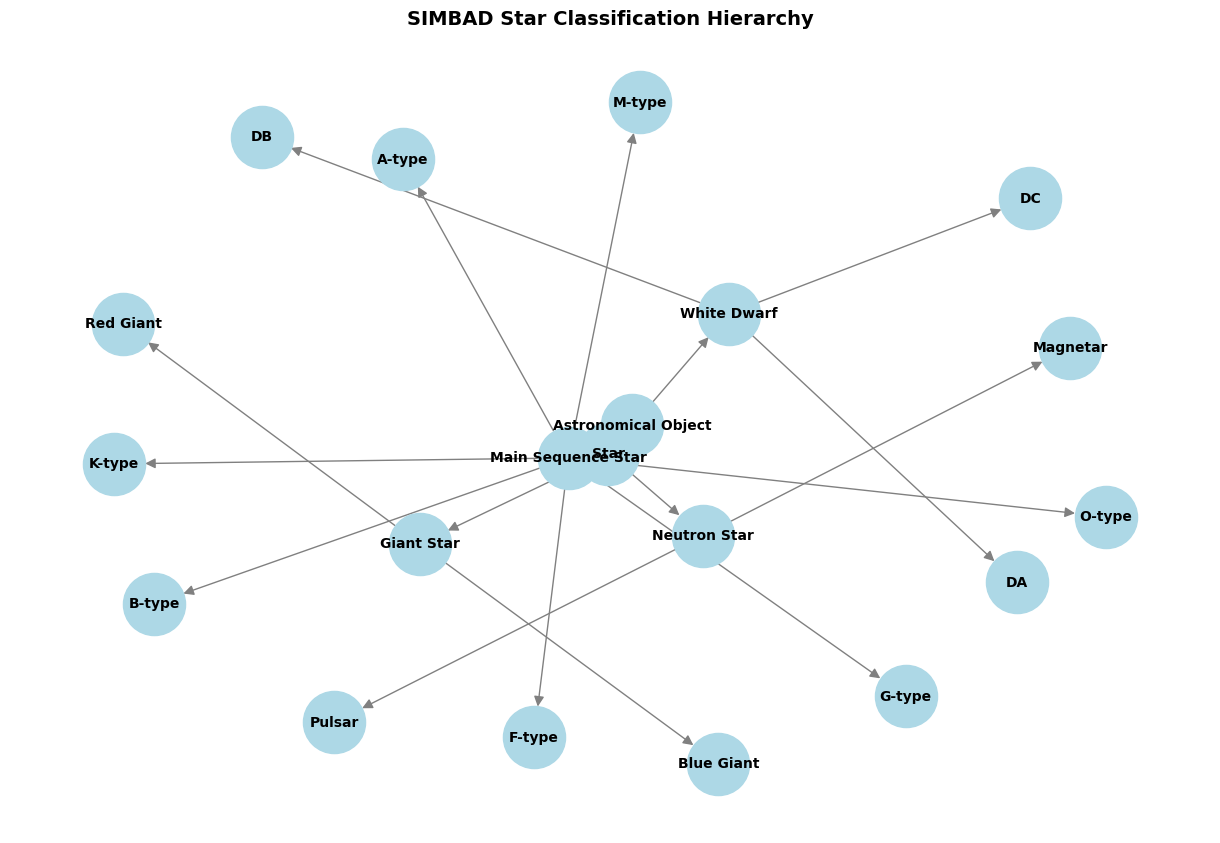

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [3]:
# Define the hierarchy in SIMBAD for stars as a dictionary
simbad_hierarchy = {
    "Astronomical Object": ["Star"],
    "Star": ["Main Sequence Star", "Giant Star", "White Dwarf", "Neutron Star"],
    "Main Sequence Star": ["O-type", "B-type", "A-type", "F-type", "G-type", "K-type", "M-type"],
    "Giant Star": ["Red Giant", "Blue Giant"],
    "White Dwarf": ["DA", "DB", "DC"],
    "Neutron Star": ["Pulsar", "Magnetar"],
}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for parent, children in simbad_hierarchy.items():
    for child in children:
        G.add_edge(parent, child)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Use a consistent layout for reproducibility
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    font_size=10,
    font_weight="bold",
    arrowsize=15,
    edge_color="gray",
)
plt.title("SIMBAD Star Classification Hierarchy", fontsize=14, fontweight="bold")
plt.show()
# Define a hierarchical tree layout for better visualization
def hierarchy_pos(G, root=None, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):
    """
    Create a hierarchical tree layout for a directed graph.
    """
    pos = nx.multipartite_layout(G, subset_key=lambda n: nx.shortest_path_length(G, root, n))
    for level in pos.values():
        level.sort(key=lambda node: pos[node][1])  # Sort by vertical position
    return pos


# Use a predefined root node for hierarchy
root = "Astronomical Object"

# Generate hierarchical positions for nodes
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

# Draw the graph with the hierarchical layout
plt.figure(figsize=(10, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    font_size=10,
    font_weight="bold",
    arrowsize=10,
    edge_color="gray",
    verticalalignment="center",
)
plt.title("SIMBAD Star Classification Hierarchy (Inspired Style)", fontsize=14, fontweight="bold")
plt.show()

# Define the hierarchy for stars based on the provided structure
star_hierarchy = {
    "*": ["Pe*", "MS*", "**", "V*", "Ev*", "Ma*", "LM*", "Y*O", "Em*", "SN*", "HV*", "PM*"],
    "Pe*": ["RC*", "a2*"],
    "MS*": ["gD*", "BS*", "Be*", "dS*"],
    "BS*": ["SX*"],
    "**": ["BY*", "SB*", "CV*", "XB*", "EB*", "El*", "Sy*", "RS*"],
    "CV*": ["No*"],
    "XB*": ["LXB", "HXB"],
    "V*": ["Ir*", "Pu*", "Ro*", "Er*"],
    "Ev*": ["LP*", "HB*", "C*", "AB*", "pA*", "Ce*", "PN", "S*", "OH*", "HS*", "RV*", "RG*", "WD*", "WV*"],
    "HB*": ["RR*"],
    "AB*": ["Mi*"],
    "Ce*": ["cC*"],
    "Ma*": ["N*", "sg*", "bC*"],
    "N*": ["Psr"],
    "sg*": ["s*r", "s*b", "s*y"],
    "s*b": ["WR*"],
    "Y*O": ["Ae*", "Or*", "out", "TT*"],
    "out": ["HH"],
    "LM*": ["BD*"]
}

# Create a directed graph for the star hierarchy
G_star = nx.DiGraph()
for parent, children in star_hierarchy.items():
    for child in children:
        G_star.add_edge(parent, child)

# Generate positions for the hierarchical layout
pos_star = nx.nx_agraph.graphviz_layout(G_star, prog="dot")

# Draw the star hierarchy graph
plt.figure(figsize=(14, 12))
nx.draw(
    G_star,
    pos_star,
    with_labels=True,
    node_color="lightgreen",
    node_size=2000,
    font_size=10,
    font_weight="bold",
    arrowsize=10,
    edge_color="gray",
)
plt.title("Partial Hierarchy of Stars in SIMBAD", fontsize=14, fontweight="bold")
plt.show()
# Define the provided hierarchy as a list of paths
hierarchy_paths = [
    "* > Pe*",
    "* > Pe* > RC*",
    "* > MS* > gD*",
    "* > ** > BY*",
    "* > ** > SB*",
    "* > V* > Ir*",
    "* > Ev* > LP*",
    "* > Ev* > HB* > RR*",
    "* > Ev* > C*",
    "* > MS* > BS* > SX*",
    "* > ** > CV*",
    "* > ** > XB* > LXB",
    "* > Ma* > N* > Psr",
    "* > MS* > BS*",
    "* > Ev* > AB*",
    "* > Ev* > HB*",
    "* > Ev* > pA*",
    "* > ** > EB*",
    "* > LM*",
    "* > Y*O > Ae*",
    "* > Ev* > Ce* > cC*",
    "* > Ma* > sg* > s*r",
    "* > ** > El*",
    "* > MS*",
    "* > Ma* > N*",
    "* > MS* > Be*",
    "* > ** > CV* > No*",
    "* > Ev* > PN",
    "* > ** > XB*",
    "* > Y*O > Or*",
    "* > Ma* > bC*",
    "* > V* > Pu*",
    "* > Ev* > S*",
    "* > Ma* > sg*",
    "* > Ev* > OH*",
    "* > Y*O > out > HH",
    "* > Pe* > a2*",
    "* > Y*O > TT*",
    "* > ** > Sy*",
    "* > Ma*",
    "* > Em*",
    "* > SN*",
    "* > Ma* > sg* > s*b",
    "* > Ev* > HS*",
    "* > Ev* > RV*",
    "* > Ma* > sg* > s*b > WR*",
    "* > **",
    "* > Ev* > RG*",
    "* > Ev* > WD*",
    "* > HV*",
    "* > Ev* > Ce*",
    "* > PM*",
    "* > Ev* > AB* > Mi*",
    "* > V* > Ro*",
    "* > Ev*",
    "* > MS* > dS*",
    "* > Ma* > sg* > s*y",
    "* > ** > XB* > HXB",
    "* > V* > Er*",
    "* > Ev* > WV*",
    "* > LM* > BD*",
    "* > ** > RS*",
    "* > Y*O",
    "* > Y*O > out",
]

# Parse hierarchy into a directed graph
star_hierarchy_graph = nx.DiGraph()
for path in hierarchy_paths:
    nodes = path.split(" > ")
    for i in range(len(nodes) - 1):
        star_hierarchy_graph.add_edge(nodes[i], nodes[i + 1])

# Draw the graph with a tree-like structure
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(star_hierarchy_graph, seed=42)  # Use a tree-like layout
nx.draw(
    star_hierarchy_graph,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=3000,
    font_size=8,
    font_weight="bold",
    edge_color="gray",
    arrowsize=10,
)
plt.title("Star Classification Hierarchy", fontsize=16, fontweight="bold")
plt.show()


In [3]:

# Define the hierarchy for stars based on the provided structure
star_hierarchy = {
    "*": ["**", "Ma*"],
    "**": ["BY*", "SB*", "CV*", "XB*", "EB*", "El*", "Sy*", "RS*"],
    "CV*": ["No*"],
    "XB*": ["LXB", "HXB"],
    "Ma*": ["N*", "sg*", "bC*"],
    "N*": ["Psr"],
    "sg*": ["s*r", "s*b", "s*y"],
    "s*b": ["WR*"],
}

# Create a directed graph for the star hierarchy
G_star = nx.DiGraph()
for parent, children in star_hierarchy.items():
    for child in children:
        G_star.add_edge(parent, child)

# Generate positions for the hierarchical layout
pos_star = nx.nx_agraph.graphviz_layout(G_star, prog="dot")

# Draw the star hierarchy graph
plt.figure(figsize=(14, 12))
nx.draw(
    G_star,
    pos_star,
    with_labels=True,
    node_color="lightgreen",
    node_size=2000,
    font_size=10,
    font_weight="bold",
    arrowsize=10,
    edge_color="gray",
)
plt.title("Partial Hierarchy of Stars in SIMBAD", fontsize=14, fontweight="bold")
plt.show()

ImportError: requires pygraphviz http://pygraphviz.github.io/

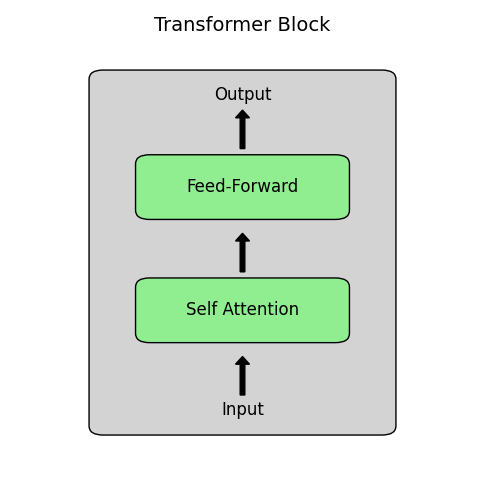

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Arrow

def plot_transformer_block(filename):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 15)
    ax.axis('off')

    # Draw the Encoder box
    encoder_box = FancyBboxPatch((2, 1.5), 6, 11.25, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey')
    ax.add_patch(encoder_box)
    ax.text(5, 14.5, "Transformer Block", ha="center", va="center", fontsize=14)

    # Draw the feed-forward box
    ff_box = FancyBboxPatch((3, 8.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(ff_box)
    ax.text(5, 9.25, "Feed-Forward", ha="center", va="center", fontsize=12)

    # Draw the self-attention box
    sa_box = FancyBboxPatch((3, 4.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(sa_box)
    ax.text(5, 5.25, "Self Attention", ha="center", va="center", fontsize=12)

    # Draw arrows
    
    ax.add_patch(Arrow(5, 2.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Input to Self-Attention
    ax.add_patch(Arrow(5, 6.5, 0, 1.25, width=0.5, color='black'))  # Arrow between Self-Attention and Feed-Forward
    ax.add_patch(Arrow(5, 10.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Feed-Forward to Encoder

    # Draw Input and Output Text
    ax.text(5, 2, "Input", ha="center", va="center", fontsize=12)
    ax.text(5, 12.25, "Output", ha="center", va="center", fontsize=12)

    plt.savefig(filename, bbox_inches='tight', transparent=True)
    plt.show()

plot_transformer_block("Images_and_Plots/transformer_block.png")


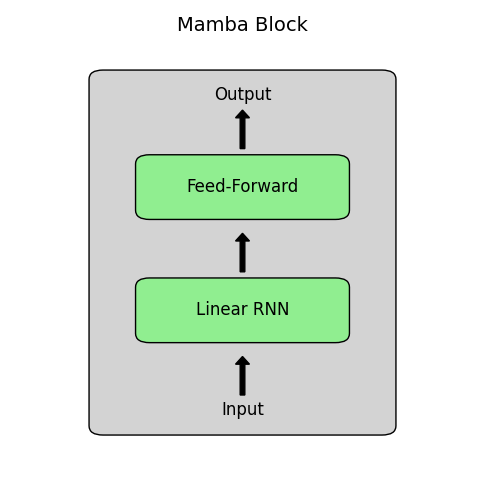

In [6]:
def plot_transformer_block(filename):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 15)
    ax.axis('off')

    # Draw the Encoder box
    encoder_box = FancyBboxPatch((2, 1.5), 6, 11.25, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey')
    ax.add_patch(encoder_box)
    ax.text(5, 14.5, "Mamba Block", ha="center", va="center", fontsize=14)

    # Draw the feed-forward box
    ff_box = FancyBboxPatch((3, 8.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(ff_box)
    ax.text(5, 9.25, "Feed-Forward", ha="center", va="center", fontsize=12)

    # Draw the self-attention box
    sa_box = FancyBboxPatch((3, 4.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(sa_box)
    ax.text(5, 5.25, "Linear RNN", ha="center", va="center", fontsize=12)

    # Draw arrows
    
    ax.add_patch(Arrow(5, 2.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Input to Self-Attention
    ax.add_patch(Arrow(5, 6.5, 0, 1.25, width=0.5, color='black'))  # Arrow between Self-Attention and Feed-Forward
    ax.add_patch(Arrow(5, 10.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Feed-Forward to Encoder

    # Draw Input and Output Text
    ax.text(5, 2, "Input", ha="center", va="center", fontsize=12)
    ax.text(5, 12.25, "Output", ha="center", va="center", fontsize=12)

    plt.savefig(filename, bbox_inches='tight', transparent=True)
    plt.show()

plot_transformer_block("Images_and_Plots/mamba_block.png")


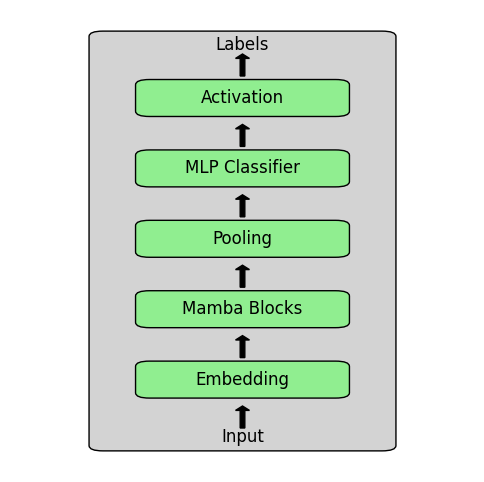

In [93]:
def plot_full_model(filename):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 26.25)
    ax.axis('off')

    # Draw the whole box
    encoder_box = FancyBboxPatch((2, 1.5), 6, 23.25, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey')
    ax.add_patch(encoder_box)
    #ax.text(5, 23.5, "Mamba Block", ha="center", va="center", fontsize=14)
    # Draw the embedding
    sa_box = FancyBboxPatch((3, 4.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(sa_box)
    ax.text(5, 5.25, "Embedding", ha="center", va="center", fontsize=12)
    # Draw the mamba box
    ff_box = FancyBboxPatch((3, 8.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(ff_box)
    ax.text(5, 9.25, "Mamba Blocks", ha="center", va="center", fontsize=12)
    # Draw the pooling box
    pooling_box = FancyBboxPatch((3, 12.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(pooling_box)
    ax.text(5, 13.25, "Pooling", ha="center", va="center", fontsize=12)
    # Draw the classifier box
    classifier_box = FancyBboxPatch((3, 16.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(classifier_box)
    ax.text(5, 17.25, "MLP Classifier", ha="center", va="center", fontsize=12)
    # Draw activation box
    activation_box = FancyBboxPatch((3, 20.5), 4, 1.5, boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgreen')
    ax.add_patch(activation_box)
    ax.text(5, 21.25, "Activation", ha="center", va="center", fontsize=12)


    

    # Draw arrows
    
    ax.add_patch(Arrow(5, 2.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Input to Self-Attention
    ax.add_patch(Arrow(5, 6.5, 0, 1.25, width=0.5, color='black'))  # Arrow between Self-Attention and Feed-Forward
    ax.add_patch(Arrow(5, 10.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Feed-Forward to Encoder
    ax.add_patch(Arrow(5, 14.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Feed-Forward to Encoder
    ax.add_patch(Arrow(5, 18.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Feed-Forward to Encoder
    ax.add_patch(Arrow(5, 22.5, 0, 1.25, width=0.5, color='black'))  # Arrow from Feed-Forward to Encoder

    # Draw Input and Output Text
    ax.text(5, 2, "Input", ha="center", va="center", fontsize=12)
    ax.text(5, 24.25, "Labels", ha="center", va="center", fontsize=12)
    plt.savefig(filename, bbox_inches='tight', transparent=True)
    plt.show()

plot_full_model("Images_and_Plots/overall_model_structure.png")

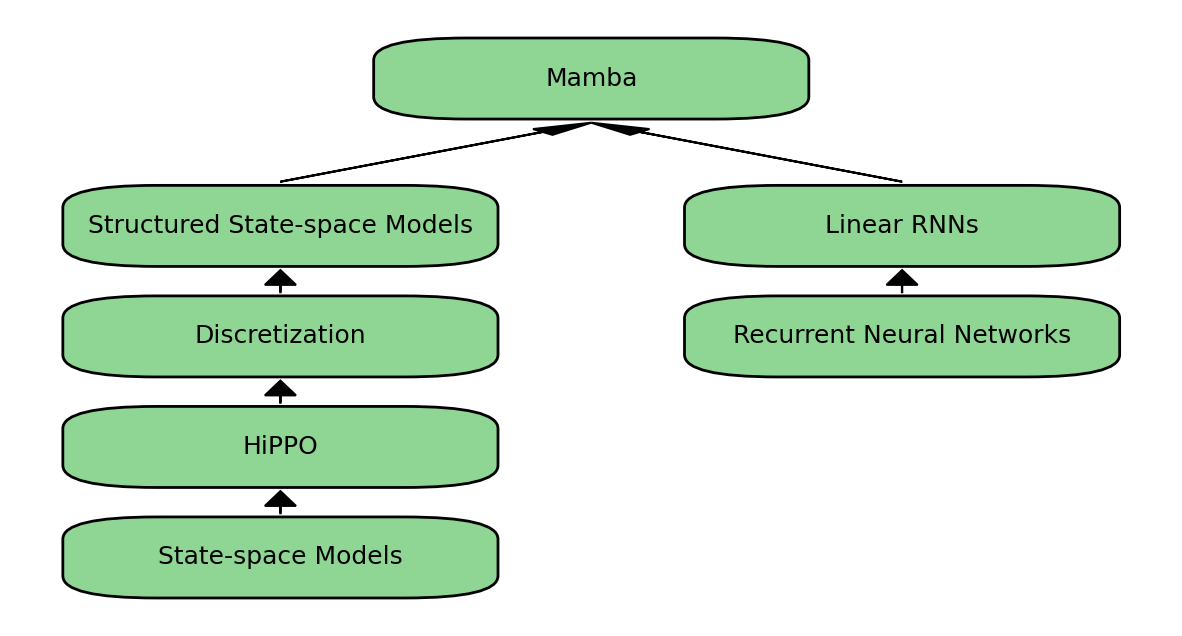

In [123]:
def plot_mamba_hierarchy_adjusted(filename):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges
    G.add_edges_from([
        ("State-space Models", "HiPPO"),
        ("HiPPO", "Discretization"),
        ("Discretization", "Structured State-space Models"),
        ("Structured State-space Models", "Mamba"),
        ("Recurrent Neural Networks", "Linear RNNs"),
        ("Linear RNNs", "Mamba")
    ])

    # Define positions for the nodes
    pos = {
        "State-space Models": (0, 0),
        "HiPPO": (0, 1.5),
        "Discretization": (0, 3),
        "Structured State-space Models": (0, 4.5),
        "Recurrent Neural Networks": (2, 3),
        "Linear RNNs": (2, 4.5),
        "Mamba": (1, 6.5)
    }

    # Draw the graph with formatted nodes
    plt.figure(figsize=(15, 8))
    for node, (x, y) in pos.items():
        # Draw rectangles with rounded edges
        rect = FancyBboxPatch(
            (x - 0.4, y - 0.25), 0.8, 0.5,
            boxstyle="round,pad=0.3", edgecolor="black", facecolor="#8fd694", linewidth=2
        )
        plt.gca().add_patch(rect)
        plt.text(x, y, node, ha="center", va="center", fontsize=18, color="black")

    # Add edges as thicker arrows
    for start, end in G.edges:
        start_pos = pos[start]
        end_pos = pos[end]
        plt.arrow(
            start_pos[0], start_pos[1] + 0.6,
            end_pos[0] - start_pos[0], end_pos[1] - start_pos[1] - 1.2,
            head_width=0.1, head_length=0.2, fc="black", ec="black", linewidth=1.5, length_includes_head=True
        )

    # Remove axis
    plt.axis("off")
    plt.savefig(filename, bbox_inches="tight", transparent=True)
    plt.show()

plot_mamba_hierarchy_adjusted("Images_and_Plots/path_of_understanding_mamba.png")


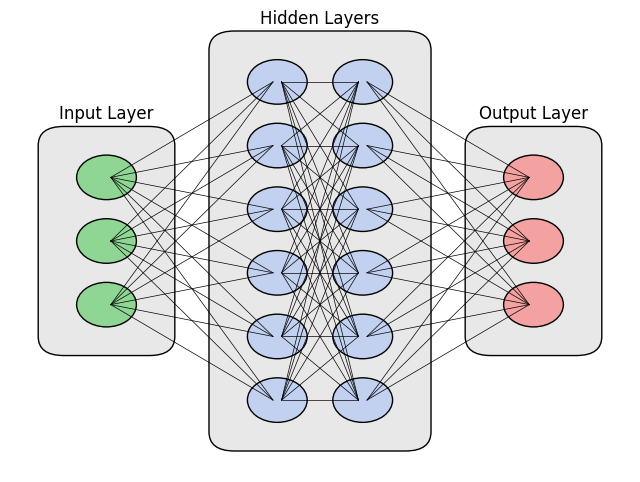

In [154]:
def plot_neural_network_with_boxes(filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis("off")

    # Define positions for the layers
    input_layer = [(0, i+1.5) for i in range(3)]
    hidden_layer1 = [(2, i) for i in range(6)]
    hidden_layer2 = [(3, i) for i in range(6)]
    output_layer = [(5, i+1.5) for i in range(3)]

    # Define layer colors
    layer_colors = {"input": "#8fd694", "hidden": "#c2d1f0", "output": "#f4a1a1"}

    # Draw background boxes
    ax.add_patch(FancyBboxPatch((-0.5, 1), 1, 3, boxstyle="round,pad=0.3", edgecolor="black", facecolor="#e8e8e8"))
    ax.add_patch(FancyBboxPatch((1.5, -0.5), 2, 6, boxstyle="round,pad=0.3", edgecolor="black", facecolor="#e8e8e8"))
    ax.add_patch(FancyBboxPatch((4.5, 1), 1, 3, boxstyle="round,pad=0.3", edgecolor="black", facecolor="#e8e8e8"))

    # Draw nodes as small circles
    for x, y in input_layer:
        ax.add_patch(FancyBboxPatch((x - 0.05, y - 0.05), 0.1, 0.1, boxstyle="circle", facecolor=layer_colors["input"], edgecolor="black"))
    for x, y in hidden_layer1 + hidden_layer2:
        ax.add_patch(FancyBboxPatch((x - 0.05, y - 0.05), 0.1, 0.1, boxstyle="circle", facecolor=layer_colors["hidden"], edgecolor="black"))
    for x, y in output_layer:
        ax.add_patch(FancyBboxPatch((x - 0.05, y - 0.05), 0.1, 0.1, boxstyle="circle", facecolor=layer_colors["output"], edgecolor="black"))

    # Draw connections
    for x1, y1 in input_layer:
        for x2, y2 in hidden_layer1:
            ax.plot([x1 + 0.05, x2 - 0.05], [y1, y2], "k-", lw=0.5)
    for x1, y1 in hidden_layer1:
        for x2, y2 in hidden_layer2:
            ax.plot([x1 + 0.05, x2 - 0.05], [y1, y2], "k-", lw=0.5)
    for x1, y1 in hidden_layer2:
        for x2, y2 in output_layer:
            ax.plot([x1 + 0.05, x2 - 0.05], [y1, y2], "k-", lw=0.5)

    # Add labels
    ax.text(0, 4.5, "Input Layer", fontsize=12, ha="center", va="center")
    ax.text(2.5, 6, "Hidden Layers", fontsize=12, ha="center", va="center")
    ax.text(5, 4.5, "Output Layer", fontsize=12, ha="center", va="center")

    plt.savefig(filename, bbox_inches="tight", transparent=True)
    plt.show()

plot_neural_network_with_boxes("Images_and_Plots/feed-forward.png")


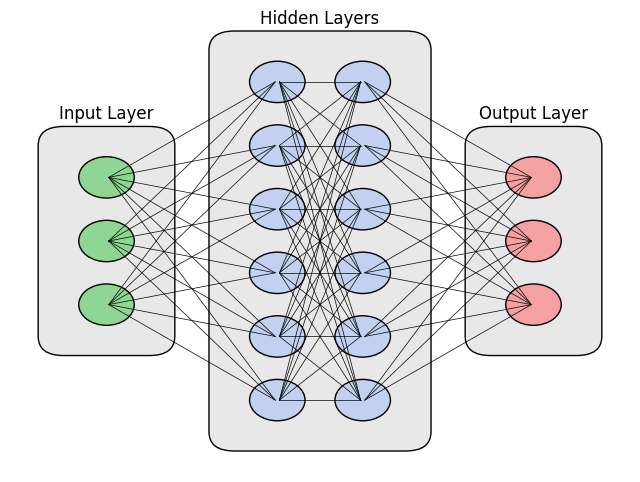

In [160]:
def plot_neural_network_with_fixed_circle_size(filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis("off")

    # Define positions for the layers
    input_layer = [(0, i + 1.5) for i in range(3)]
    hidden_layer1 = [(2, i) for i in range(6)]
    hidden_layer2 = [(3, i) for i in range(6)]
    output_layer = [(5, i + 1.5) for i in range(3)]

    # Define layer colors
    layer_colors = {"input": "#8fd694", "hidden": "#c2d1f0", "output": "#f4a1a1"}

    # Draw background boxes
    ax.add_patch(FancyBboxPatch((-0.5, 1), 1, 3, boxstyle="round,pad=0.3", edgecolor="black", facecolor="#e8e8e8"))
    ax.add_patch(FancyBboxPatch((1.5, -0.5), 2, 6, boxstyle="round,pad=0.3", edgecolor="black", facecolor="#e8e8e8"))
    ax.add_patch(FancyBboxPatch((4.5, 1), 1, 3, boxstyle="round,pad=0.3", edgecolor="black", facecolor="#e8e8e8"))

    # Draw nodes as much smaller circles
    circle_size = 0.05  # Significantly smaller radius
    for x, y in input_layer:
        ax.add_patch(FancyBboxPatch((x - circle_size / 2, y - circle_size / 2), circle_size, circle_size, boxstyle="circle", facecolor=layer_colors["input"], edgecolor="black"))
    for x, y in hidden_layer1 + hidden_layer2:
        ax.add_patch(FancyBboxPatch((x - circle_size / 2, y - circle_size / 2), circle_size, circle_size, boxstyle="circle", facecolor=layer_colors["hidden"], edgecolor="black"))
    for x, y in output_layer:
        ax.add_patch(FancyBboxPatch((x - circle_size / 2, y - circle_size / 2), circle_size, circle_size, boxstyle="circle", facecolor=layer_colors["output"], edgecolor="black"))

    # Draw connections
    for x1, y1 in input_layer:
        for x2, y2 in hidden_layer1:
            ax.plot([x1 + circle_size / 2, x2 - circle_size / 2], [y1, y2], "k-", lw=0.5)
    for x1, y1 in hidden_layer1:
        for x2, y2 in hidden_layer2:
            ax.plot([x1 + circle_size / 2, x2 - circle_size / 2], [y1, y2], "k-", lw=0.5)
    for x1, y1 in hidden_layer2:
        for x2, y2 in output_layer:
            ax.plot([x1 + circle_size / 2, x2 - circle_size / 2], [y1, y2], "k-", lw=0.5)

    # Add labels
    ax.text(0, 4.5, "Input Layer", fontsize=12, ha="center", va="center")
    ax.text(2.5, 6, "Hidden Layers", fontsize=12, ha="center", va="center")
    ax.text(5, 4.5, "Output Layer", fontsize=12, ha="center", va="center")

    plt.savefig(filename, bbox_inches="tight", transparent=True)
    plt.show()

plot_neural_network_with_fixed_circle_size("Images_and_Plots/feed-forward.png")


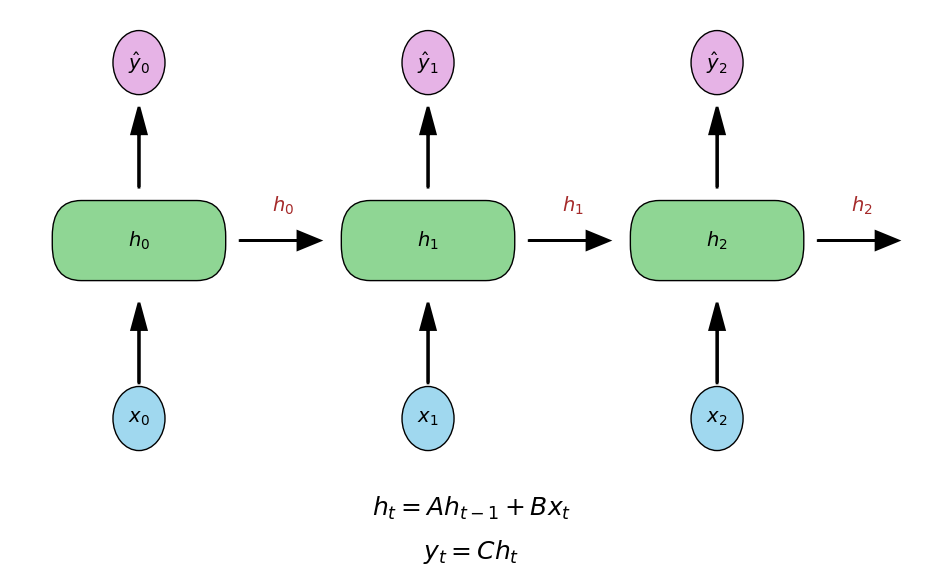

In [42]:
def plot_recurrent_neuron_diagram_scaled(filename):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis("off")

    # Define positions for elements (scaled by 10)
    left = 20
    middle = 40
    right = 60
    recurrent_cells = [(left, 20), (middle, 20), (right, 20)]
    inputs = [(left, 10), (middle, 10), (right, 10)]
    outputs = [(left, 30), (middle, 30), (right, 30)]
    states = ["$h_0$", "$h_1$", "$h_2$"]
    state_arrows = [(27, 20, 4), (47, 20, 4), (67, 20, 4)]

    # Colors
    recurrent_color = "#8fd694"
    input_color = "#a0d8ef"
    output_color = "#e6b3e6"

    # Draw recurrent cells
    for x, y in recurrent_cells:
        ax.add_patch(FancyBboxPatch((x - 4, y - 0.25), 8, 0.5, boxstyle="round,pad=2", edgecolor="black", facecolor=recurrent_color))
        ax.text(x, y, f"$h_{{{recurrent_cells.index((x, y))}}}$", ha="center", va="center", fontsize=14, color="black")

    # Draw inputs
    circle_size = 1.5
    for x, y in inputs:
        ax.add_patch(FancyBboxPatch((x - circle_size, y - circle_size), 2 * circle_size, 2 * circle_size, boxstyle="circle", edgecolor="black", facecolor=input_color))
        ax.text(x, y, f"$x_{{{inputs.index((x, y))}}}$", ha="center", va="center", fontsize=14, color="black")

    # Draw outputs
    for x, y in outputs:
        ax.add_patch(FancyBboxPatch((x - circle_size, y - circle_size), 2 * circle_size, 2 * circle_size, boxstyle="circle", edgecolor="black", facecolor=output_color))
        ax.text(x, y, f"$\\hat{{y}}_{{{outputs.index((x, y))}}}$", ha="center", va="center", fontsize=14, color="black")

    # Draw arrows from input to recurrent cell
    for x, y in inputs:
        ax.arrow(x, y+13 , 0, 3, head_width=1, head_length=1.5, fc="black", ec="black", linewidth=2)

    # Draw arrows from recurrent cell to output
    for x, y in recurrent_cells:
        ax.arrow(x, y - 8, 0, 3, head_width=1, head_length=1.5, fc="black", ec="black", linewidth=2)

    # Draw arrows between recurrent cells
    for x, y, dx in state_arrows:
        ax.arrow(x, y, dx, 0, head_width=1, head_length=1.5, fc="black", ec="black", linewidth=2)

    # Add hidden state labels
    for i, (x, y) in enumerate(recurrent_cells):
        ax.text(x+10 , y + 2, states[i], fontsize=14, ha="center", va="center", color="brown")

    # Add equation at the bottom
    ax.text(43, 5, r"$h_t = Ah_{t-1} + Bx_t$", fontsize=18, ha="center", va="center", color="black")
    ax.text(43, 2.5, r"$y_t = Ch_t$", fontsize=18, ha="center", va="center", color="black")

    plt.savefig(filename, bbox_inches="tight", transparent=True)
    plt.show()

plot_recurrent_neuron_diagram_scaled("Images_and_Plots/RNN_schematic.png")


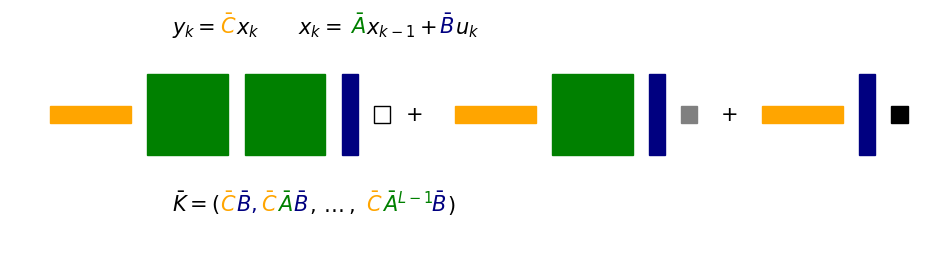

In [390]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Update the diagram by adding white and grey squares, along with previous adjustments

fig, ax = plt.subplots(figsize=(12, 6))

# Draw rectangles and lines
# Left orange rectangle
ax.add_patch(Rectangle((0, 0.6), 1, 0.2, color="orange"))

# Green squares (two side by side)
ax.add_patch(Rectangle((1.2, 0.2), 1, 1, color="green"))
ax.add_patch(Rectangle((2.4, 0.2), 1, 1, color="green"))

# Blue vertical rectangle
ax.add_patch(Rectangle((3.6, 0.2), 0.2, 1, color="navy"))

# White square
ax.add_patch(Rectangle((4.0, 0.6), 0.2, 0.2, edgecolor="black", facecolor="white"))

# Add a '+' sign
plt.text(4.5, 0.7, '+', fontsize=15, verticalalignment='center', horizontalalignment='center')

# Orange rectangle again
ax.add_patch(Rectangle((5, 0.6), 1, 0.2, color="orange"))

# Green square
ax.add_patch(Rectangle((6.2, 0.2), 1, 1, color="green"))

# Blue vertical rectangle again
ax.add_patch(Rectangle((7.4, 0.2), 0.2, 1, color="navy"))

# Grey square
ax.add_patch(Rectangle((7.8, 0.6), 0.2, 0.2, color="grey"))

# Add another '+' sign
plt.text(8.4, 0.7, '+', fontsize=15, verticalalignment='center', horizontalalignment='center')

# Orange rectangle
ax.add_patch(Rectangle((8.8, 0.6), 1, 0.2, color="orange"))

# Blue vertical rectangle again
ax.add_patch(Rectangle((10, 0.2), 0.2, 1, color="navy"))

# Small black square (dot representation)
ax.add_patch(Rectangle((10.4, 0.6), 0.2, 0.2, color="black"))

# Add the formula text above the diagram with manual color positioning
ax.text(1.5, 1.7, r"$y_k =$", fontsize=15, color="black")
ax.text(2.1, 1.7, r"$\bar{C}$", fontsize=15, color="orange")
ax.text(2.3, 1.7, r"$x_k \quad \quad x_k =$", fontsize=15, color="black")
ax.text(3.7, 1.7, r"$\bar{A}$", fontsize=15, color="green")
ax.text(3.9, 1.7, r"$x_{k-1} +$", fontsize=15, color="black")
ax.text(4.8, 1.7, r"$\bar{B}$", fontsize=15, color="navy")
ax.text(5, 1.7, r"$u_k$", fontsize=15,color="black")

# Add the bottom formula text with manual color positioning
ax.text(1.5, -0.5, r"$\bar{K} = ($", fontsize=15, color="black")
ax.text(2.1, -0.5, r"$\bar{C}$", fontsize=15, color="orange")
ax.text(2.3, -0.5, r"$\bar{B}, \quad$", fontsize=15,  color="navy")
ax.text(2.6, -0.5, r"$\bar{C}$", fontsize=15,  color="orange")
ax.text(2.8, -0.5, r"$\bar{A}$", fontsize=15, color="green")
ax.text(3, -0.5, r"$\bar{B}$", fontsize=15,  color="navy")
ax.text(3.2, -0.5, r"$,\dots,$", fontsize=15, color="black")
ax.text(3.9, -0.5, r"$\bar{C}$", fontsize=15,  color="orange")
ax.text(4.1, -0.5, r"$\bar{A}^{L-1}$", fontsize=15, color="green")
ax.text(4.7, -0.5, r"$\bar{B}$", fontsize=15, color="navy")
ax.text(4.9, -0.5, r"$)$", fontsize=15,  color="black")

# Set limits and aspect
ax.set_xlim(-0.5, 11)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Display the updated diagram
plt.savefig("Images_and_Plots/Computing_y3", bbox_inches="tight", transparent=True)
plt.show()


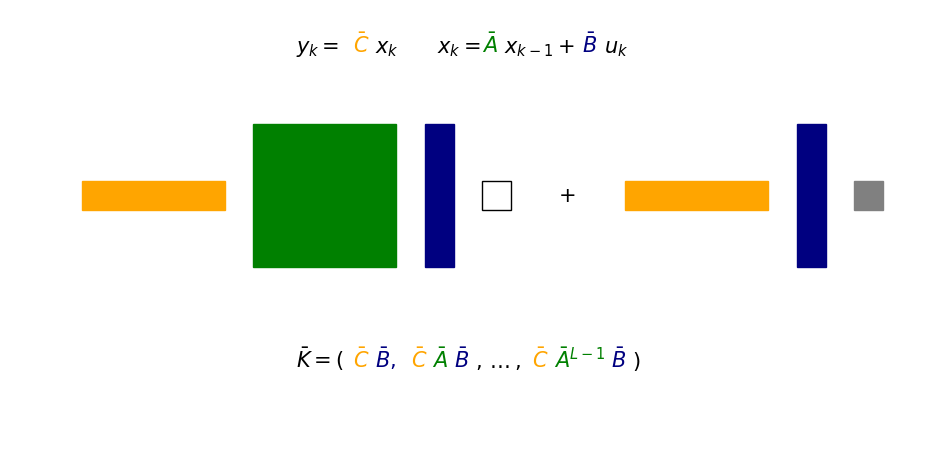

In [389]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Diagram for y1 computation

fig, ax = plt.subplots(figsize=(12, 6))

# Draw rectangles and lines
# Left orange rectangle
ax.add_patch(Rectangle((0, 0.6), 1, 0.2, color="orange"))

# Green square
ax.add_patch(Rectangle((1.2, 0.2), 1, 1, color="green"))

# Blue vertical rectangle
ax.add_patch(Rectangle((2.4, 0.2), 0.2, 1, color="navy"))

# White square
ax.add_patch(Rectangle((2.8, 0.6), 0.2, 0.2, edgecolor="black", facecolor="white"))

# Add a '+' sign
plt.text(3.4, 0.7, '+', fontsize=15, verticalalignment='center', horizontalalignment='center')

# Orange rectangle again
ax.add_patch(Rectangle((3.8, 0.6), 1, 0.2, color="orange"))

# Blue vertical rectangle
ax.add_patch(Rectangle((5, 0.2), 0.2, 1, color="navy"))

# Small black square (dot representation)
ax.add_patch(Rectangle((5.4, 0.6), 0.2, 0.2, color="gray"))


# Add the formula text above the diagram with manual color positioning
ax.text(1.5, 1.7, r"$y_k =$", fontsize=15, color="black")
ax.text(1.9, 1.7, r"$\bar{C}$", fontsize=15, color="orange")
ax.text(2.05, 1.7, r"$x_k \quad \quad x_k =$", fontsize=15, color="black")
ax.text(2.8, 1.7, r"$\bar{A}$", fontsize=15, color="green")
ax.text(2.95, 1.7, r"$x_{k-1} +$", fontsize=15, color="black")
ax.text(3.5, 1.7, r"$\bar{B}$", fontsize=15, color="navy")
ax.text(3.65, 1.7, r"$u_k$", fontsize=15,color="black")

# Add the bottom formula text with manual color positioning
ax.text(1.5, -0.5, r"$\bar{K} = ($", fontsize=15, color="black")
ax.text(1.9, -0.5, r"$\bar{C}$", fontsize=15, color="orange")
ax.text(2.05, -0.5, r"$\bar{B}, \quad$", fontsize=15,  color="navy")
ax.text(2.3, -0.5, r"$\bar{C}$", fontsize=15,  color="orange")
ax.text(2.45, -0.5, r"$\bar{A}$", fontsize=15, color="green")
ax.text(2.6, -0.5, r"$\bar{B}$", fontsize=15,  color="navy")
ax.text(2.75, -0.5, r"$,\dots,$", fontsize=15, color="black")
ax.text(3.15, -0.5, r"$\bar{C}$", fontsize=15,  color="orange")
ax.text(3.3, -0.5, r"$\bar{A}^{L-1}$", fontsize=15, color="green")
ax.text(3.7, -0.5, r"$\bar{B}$", fontsize=15, color="navy")
ax.text(3.85, -0.5, r"$)$", fontsize=15,  color="black")

# Set limits and aspect
ax.set_xlim(-0.5, 6)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Display the updated diagram
plt.savefig("Images_and_Plots/Computing_y2", bbox_inches="tight", transparent=True)
plt.show()


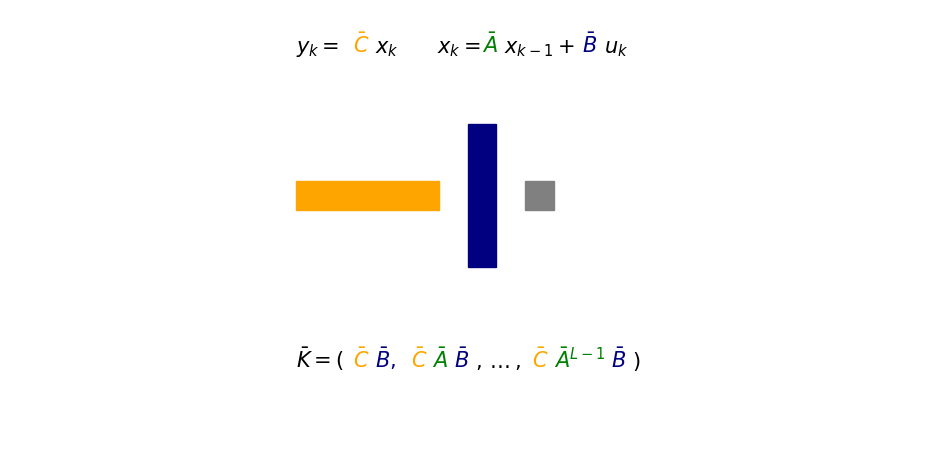

In [388]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Diagram for y1 computation

fig, ax = plt.subplots(figsize=(12, 6))


# Orange rectangle again
ax.add_patch(Rectangle((1.5, 0.6), 1, 0.2, color="orange"))

# Blue vertical rectangle
ax.add_patch(Rectangle((2.7, 0.2), 0.2, 1, color="navy"))

# Small black square (dot representation)
ax.add_patch(Rectangle((3.1, 0.6), 0.2, 0.2, color="gray"))


# Add the formula text above the diagram with manual color positioning
ax.text(1.5, 1.7, r"$y_k =$", fontsize=15, color="black")
ax.text(1.9, 1.7, r"$\bar{C}$", fontsize=15, color="orange")
ax.text(2.05, 1.7, r"$x_k \quad \quad x_k =$", fontsize=15, color="black")
ax.text(2.8, 1.7, r"$\bar{A}$", fontsize=15, color="green")
ax.text(2.95, 1.7, r"$x_{k-1} +$", fontsize=15, color="black")
ax.text(3.5, 1.7, r"$\bar{B}$", fontsize=15, color="navy")
ax.text(3.65, 1.7, r"$u_k$", fontsize=15,color="black")

# Add the bottom formula text with manual color positioning
ax.text(1.5, -0.5, r"$\bar{K} = ($", fontsize=15, color="black")
ax.text(1.9, -0.5, r"$\bar{C}$", fontsize=15, color="orange")
ax.text(2.05, -0.5, r"$\bar{B}, \quad$", fontsize=15,  color="navy")
ax.text(2.3, -0.5, r"$\bar{C}$", fontsize=15,  color="orange")
ax.text(2.45, -0.5, r"$\bar{A}$", fontsize=15, color="green")
ax.text(2.6, -0.5, r"$\bar{B}$", fontsize=15,  color="navy")
ax.text(2.75, -0.5, r"$,\dots,$", fontsize=15, color="black")
ax.text(3.15, -0.5, r"$\bar{C}$", fontsize=15,  color="orange")
ax.text(3.3, -0.5, r"$\bar{A}^{L-1}$", fontsize=15, color="green")
ax.text(3.7, -0.5, r"$\bar{B}$", fontsize=15, color="navy")
ax.text(3.85, -0.5, r"$)$", fontsize=15,  color="black")

# Set limits and aspect
ax.set_xlim(-0.5, 6)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
ax.axis('off')  # Hide axes

# Display the updated diagram
plt.savefig("Images_and_Plots/Computing_y1", bbox_inches="tight", transparent=True)
plt.show()


In [43]:
from graphviz import Source
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

dot_code = """
digraph G {
    rankdir=BT;  // Bottom-to-top layout

    // Align nodes horizontally in each layer
    { rank=same; y1; y2; y3 }  // Layer 1: y nodes
    { rank=same; C1; C2; C3 }  // Layer 2: C nodes
    { rank=same; h1; h2; h3; A1; A2 }  // Layer 3: h and A nodes
    { rank=same; B1; B2; B3 }  // Layer 4: B nodes
    { rank=same; X1; X2; X3 }  // Layer 5: X nodes

    // Define nodes with subscripts
    X1 [label=<X<sub>1</sub>>, color="red", shape="circle"]
    X2 [label=<X<sub>2</sub>>, color="red", shape="circle"]
    X3 [label=<X<sub>3</sub>>, color="red", shape="circle"]
    B1 [label=<B<sub>1</sub>>, color="green", shape="square"]
    B2 [label=<B<sub>2</sub>>, color="green", shape="square"]
    B3 [label=<B<sub>3</sub>>, color="green", shape="square"]
    h1 [label=<h<sub>t=1</sub>>, color="gray"]
    h2 [label=<h<sub>t=2</sub>>, color="gray"]
    h3 [label=<h<sub>t=3</sub>>, color="gray"]
    A1 [label="A", color="goldenrod", shape="square"]
    A2 [label="A", color="goldenrod", shape="square"]
    C1 [label=<C<sub>1</sub>>, color="blue", shape="square"]
    C2 [label=<C<sub>2</sub>>, color="blue", shape="square"]
    C3 [label=<C<sub>3</sub>>, color="blue", shape="square"]
    y1 [label=<y<sub>1</sub>>, color="purple", shape="circle"]
    y2 [label=<y<sub>2</sub>>, color="purple", shape="circle"]
    y3 [label=<y<sub>3</sub>>, color="purple", shape="circle"]

    // Define connections
    X1 -> B1 -> h1 -> C1 -> y1
    h1 -> A1 -> h2
    X2 -> B2 -> h2 -> C2 -> y2
    h2 -> A2 -> h3
    X3 -> B3 -> h3 -> C3 -> y3
}
"""
graph = Source(dot_code)
graph.render('aligned_layers_diagram_with_subscripts', format='png', view=True)


'aligned_layers_diagram_with_subscripts.png'

In [35]:
from graphviz import Source
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

dot_code = """
digraph G {
    rankdir=BT;  // Bottom-to-top layout

    // Align nodes horizontally in each layer
    { rank=same; y1; y2; y3 }  // Layer 1: y nodes
    { rank=same; C1; C2; C3 }  // Layer 2: C nodes
    { rank=same; h1; h2; h3; A1; A2; A3 }  // Layer 3: h and A nodes
    { rank=same; B1; B2; B3 }  // Layer 4: B nodes
    { rank=same; X1; X2; X3 }  // Layer 5: X nodes

    // Nodes with updated shapes
    X1 [label=<X<sub>1</sub>>, color="red", shape="circle"]
    X2 [label=<X<sub>2</sub>>, color="red", shape="circle"]
    X3 [label=<X<sub>3</sub>>, color="red", shape="circle"]
    B1 [label=<B<sub>1</sub>>, color="green", shape="square"]
    B2 [label=<B<sub>2</sub>>, color="green", shape="square"]
    B3 [label=<B<sub>3</sub>>, color="green", shape="square"]
    h1 [label=<h<sub>t=1</sub>>, color="gray", shape="ellipse"]
    h2 [label=<h<sub>t=2</sub>>, color="gray", shape="ellipse"]
    h3 [label=<h<sub>t=3</sub>>, color="gray", shape="ellipse"]
    A1 [label="A", color="goldenrod", shape="square"]
    A2 [label="A", color="goldenrod", shape="square"]
    A3 [label="A", color="goldenrod", shape="square"]
    C1 [label=<C<sub>1</sub>>, color="blue", shape="square"]
    C2 [label=<C<sub>2</sub>>, color="blue", shape="square"]
    C3 [label=<C<sub>3</sub>>, color="blue", shape="square"]
    y1 [label=<y<sub>1</sub>>, color="purple", shape="circle"]
    y2 [label=<y<sub>2</sub>>, color="purple", shape="circle"]
    y3 [label=<y<sub>3</sub>>, color="purple", shape="circle"]

    // Define connections
    X1 -> B1 -> h1 -> C1 -> y1
    h1 -> A1 -> h2
    X2 -> B2 -> h2 -> C2 -> y2
    h2 -> A2 -> h3
    X3 -> B3 -> h3 -> C3 -> y3

    // Add legend as a subgraph
    subgraph cluster_legend {
        label="Index";
        color="black";
        node [shape=plaintext];
        key [label=<
            <table border="0" cellpadding="2" cellspacing="0" cellborder="0">
                <tr><td align="right">O</td><td align="left">Input/Output Values</td></tr>
                <tr><td align="right">⬛</td><td align="left">Matrices</td></tr>
                <tr><td align="right"><font face="Arial">&#9711;</font></td><td align="left">Hidden State (Oval)</td></tr>
                <tr><td align="right">ellipse</td><td align="left">Hidden State</td></tr>
            </table>
        >];
    }
}
"""
graph = Source(dot_code)
graph.render('aligned_layers_diagram_with_index', format='png', view=True)


'aligned_layers_diagram_with_index.png'